# Cloud Execution

**Note:** To use Ploomber Cloud, you need an API key, [click here](https://docs.ploomber.io/en/latest/cloud/api-key.html) to get one.

Ploomber Cloud allows you to go from your local environment to a distributed environment in the cloud (to run hundreds of experiments in parallel!) and back in a single command.

## The pipeline

We'll run a sample pipeline that prepares some data and trains 10 models in parallel, here's how the pipeline looks like:

In [1]:
from ploomber.spec import DAGSpec

  0%|          | 0/13 [00:00<?, ?it/s]

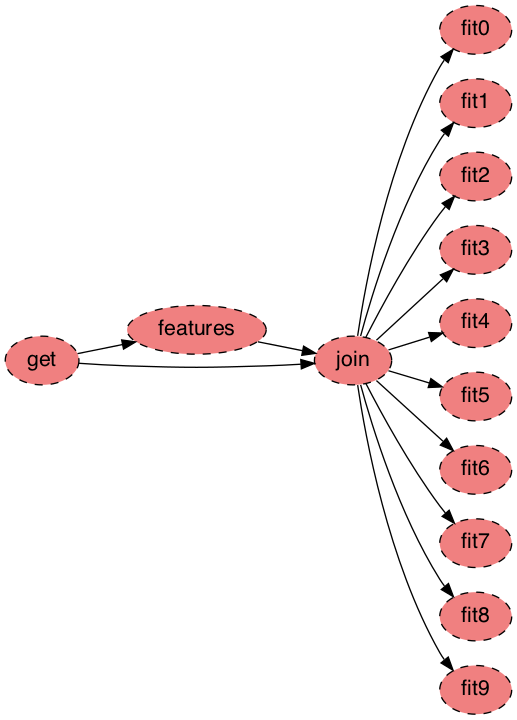

In [2]:
dag = DAGSpec('pipeline.yaml').to_dag()
dag.plot()

All we need is to provide a `requirements.lock.txt` with the dependencies that our project needs. No need to learn Kubernetes! Ploomber Cloud will to all the heavy lifting of sending our code to the cloud, creating a Docker image, scheduling jobs, communicating them and storing the results.

## Setup

We are constantly updating the Ploomber Cloud CLI so ensure you're running the latest version:

```sh
pip install ploomber --upgrade
```

Now, let's set our API key:

```sh
ploomber cloud set-key {your-key}
```

Download this example:

```sh
# download
ploomber examples -n guides/cloud-execution -o example

# move to the example
cd example
```

## To the cloud!

In Ploomber, you run pipelines locally with:

```sh
ploomber build
```

To run the pipeline in the cloud, you do:

```sh
ploomber cloud build
```

Let's see it in action!

In [6]:
%%sh
ploomber cloud build

Zipping project -> project.zip
Uploading project...
Uploaded project, starting execution...
Starting build...


That's it! Let's now check that our pipeline was scheduled:

In [7]:
%%sh
ploomber cloud list

created_at      runid                                 status
--------------  ------------------------------------  --------
14 seconds ago  136f9b47-27fa-4f65-b06f-b6fe665f3ea9  created
8 hours ago     62ac3682-b1bf-4521-aa26-260135a2f982  finished
10 hours ago    921748f6-5ef7-4f4e-a500-07162d1e3245  finished
12 hours ago    2b21a085-1d03-4426-be99-0f7a1b8c4f2e  finished
13 hours ago    abd50a1c-f5ee-479b-9a3c-92c7be172b9e  finished


We can see our runs in the list, let's copy the ID to retrieve the status:

In [8]:
%%sh
ploomber cloud status 136f9b47-27fa-4f65-b06f-b6fe665f3ea9 

Run created...


"Run created..." means Ploomber Cloud is building the Docker image, let's wait a minute to give it some time to finish and send the jobs to the cluster. Ploomber Cloud runs one container per task, allowing you to parallelize our pipeline easily!

You can check the Docker image building docs with the following command:

In [9]:
%%sh
ploomber cloud logs 136f9b47-27fa-4f65-b06f-b6fe665f3ea9 --image

Image build hasn't started yet...


It'll take about a minute for the Docker build process to start, you may execute the following command to continuously watch the logs:

```sh
ploomber cloud logs {runid} --image --watch
```

Let's check the status of the individual tasks:

In [11]:
%%sh
ploomber cloud status 136f9b47-27fa-4f65-b06f-b6fe665f3ea9

taskid                          name    runid                           status
------------------------------  ------  ------------------------------  --------
da8f149e-27cb-4297-8061-8dae36  fit5    136f9b47-27fa-4f65-b06f-b6fe66  created
1ab37b                                  5f3ea9
c6920fd4-ba65-495c-b022-d68274  fit9    136f9b47-27fa-4f65-b06f-b6fe66  created
ff7307                                  5f3ea9
9bfdaf0e-28d3-43b1-9c91-c1e185  fit6    136f9b47-27fa-4f65-b06f-b6fe66  created
255797                                  5f3ea9
69cbd6db-0b29-49db-a87a-70c70c  fit1    136f9b47-27fa-4f65-b06f-b6fe66  created
fb066f                                  5f3ea9
b26948e3-4ff8-49e7-afbf-9c3cf1  fit0    136f9b47-27fa-4f65-b06f-b6fe66  created
ac0f75                                  5f3ea9
13e30907-9adb-4fd2-ac1d-c70c5b  join    136f9b47-27fa-4f65-b06f-b6fe66  created
a6368a                                  5f3ea9
bef13025-b0f3-4563-95f0-95b332  fit7    136f9b47-27fa-4f65-b06f-b6fe66  create

Great! We see that our jobs have been scheduled.

You can execute the following to watch the task status continuously:

```sh
ploomber cloud status {runid} --watch                                   
```

Let's give it a few minutes for it to finish training the 10 models, and run the command again:

In [12]:
%%sh
ploomber cloud status 136f9b47-27fa-4f65-b06f-b6fe665f3ea9

taskid                          name    runid                           status
------------------------------  ------  ------------------------------  --------
da8f149e-27cb-4297-8061-8dae36  fit5    136f9b47-27fa-4f65-b06f-b6fe66  finished
1ab37b                                  5f3ea9
c6920fd4-ba65-495c-b022-d68274  fit9    136f9b47-27fa-4f65-b06f-b6fe66  finished
ff7307                                  5f3ea9
9bfdaf0e-28d3-43b1-9c91-c1e185  fit6    136f9b47-27fa-4f65-b06f-b6fe66  finished
255797                                  5f3ea9
69cbd6db-0b29-49db-a87a-70c70c  fit1    136f9b47-27fa-4f65-b06f-b6fe66  finished
fb066f                                  5f3ea9
b26948e3-4ff8-49e7-afbf-9c3cf1  fit0    136f9b47-27fa-4f65-b06f-b6fe66  finished
ac0f75                                  5f3ea9
13e30907-9adb-4fd2-ac1d-c70c5b  join    136f9b47-27fa-4f65-b06f-b6fe66  finished
a6368a                                  5f3ea9
bef13025-b0f3-4563-95f0-95b332  fit7    136f9b47-27fa-4f65-b06f-b6fe66  

## Task  logs

To check the logs for each task:

(Note: it may take a few minutes for the task to start, and hence, for the logs to be visible. Ploomber Cloud spins up the necessary infrastructure on-demand, so you only pay for what you use, however, this requires us to shut down any unused infrastructure)

In [13]:
%%sh
ploomber cloud logs 136f9b47-27fa-4f65-b06f-b6fe665f3ea9



***** START OF LOGS FOR TASK: fit0 *****
/opt/bitnami/python/lib/python3.9/runpy.py:127: RuntimeWarning: 'ploomber.cli.task' found in sys.modules after import of package 'ploomber.cli', but prior to execution of 'ploomber.cli.task'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
Executing: 100%|██████████| 11/11 [00:03<00:00,  2.78cell/s]
***** END OF LOGS FOR TASK: fit0 *****


***** START OF LOGS FOR TASK: fit9 *****
/opt/bitnami/python/lib/python3.9/runpy.py:127: RuntimeWarning: 'ploomber.cli.task' found in sys.modules after import of package 'ploomber.cli', but prior to execution of 'ploomber.cli.task'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
Executing: 100%|██████████| 11/11 [00:04<00:00,  2.50cell/s]
***** END OF LOGS FOR TASK: fit9 *****


***** START OF LOGS FOR TASK: fit8 *****
/opt/bitnami/python/lib/python3.9/runpy.py:127: RuntimeWarning: 'ploomber.cli.task' found in sys.modules after import of package 'ploomber.cli', 

## ...and back!

Great, so our jobs have finished. We can explore our cloud storage to see what files are available:

In [14]:
%%sh
ploomber cloud products

path
-----------------------
output/features.parquet
output/get.html
output/get.parquet
output/join.parquet
output/model-0.pickle
output/model-1.pickle
output/model-2.pickle
output/model-3.pickle
output/model-4.pickle
output/model-5.pickle
output/model-6.pickle
output/model-7.pickle
output/model-8.pickle
output/model-9.pickle
output/model.pickle
output/nb-0.html
output/nb-1.html
output/nb-2.html
output/nb-3.html
output/nb-4.html
output/nb-5.html
output/nb-6.html
output/nb-7.html
output/nb-8.html
output/nb-9.html
output/nb.html
output/raw.parquet


Each model training task automatically generates an HTML report, we can download the files with this command:

```sh
ploomber cloud download {pattern}
```

Where pattern is a glob-like pattern, for example to download all files:

```sh
ploomber cloud download '*'
```

Or files with a specific extension:


```sh
ploomber cloud download '*.extension'
```

Let's download the HTML reports:

In [15]:
%%sh
ploomber cloud download '*.html'

Each `fit` task generated a model evaluation report. Go check them out!

## Incremental builds

Ploomber allows you to dramatically speed up iterations with incremental builds. Let's revisit our pipeline structure:

  0%|          | 0/13 [00:00<?, ?it/s]

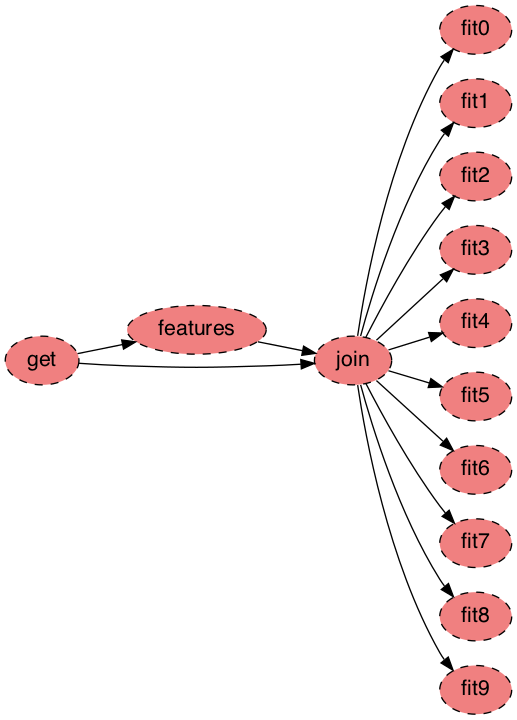

In [16]:
dag.plot()

Let's say you modify the `join` task. If you run `ploomber cloud build`, Ploomber Cloud will only execute the tasks that have changed. So it will run `join`, and all the `fit` tasks, but skip `get`, and `features`!

To force execution of all tasks, you may execute:  `ploomber cloud build --force`


## Debugging

If any of your notebooks (or scripts) fails, a copy of the partially executed notebook will be uploaded, so you can debug it.

For example, let's say I add the following in my notebook/script:

```python
raise ValueError('some new error!')
```

Upon, execution, I can retrieve the logs with:

```
ploomber cloud logs {runid}
```

And I'll see the following:

```
---------------------------------------------------------------------------
Exception encountered at "In [9]":
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
/tmp/ipykernel_41/2195319445.py in <cell line: 1>()
----> 1 raise ValueError('some new error!')
ValueError: some new error!
```

And a few lines below:

```
ploomber.exceptions.TaskBuildError: Error when executing task 'fit'. Partially executed notebook uploaded to remote storage at: products//project/output/nb.ipynb
```

I can download that partially executed notebook with:

```
ploomber cloud download '*nb.ipynb'
```

Then, I can open the notebook and I'll see the code and cells with their corresponding output so I can debug!

## Abort an executing job

At the moment we do not support concurrent executions. If you wish to submit a different job while there is one executing in the cloud, you will need to abort the running one using this command:

```
ploomber cloud abort {runid}
```

Note: to get the list of runids, execute `ploomber cloud list`

## That's it!

We hope you enjoyed this tutorial and are excited to use Ploomber in your next project. Questions? [Ping us on Slack!](https://ploomber.io/community)